<a href="https://colab.research.google.com/github/DHub6/UAS_DATAMINING/blob/main/201220092_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving Bank Customer Churn Dataset.csv to Bank Customer Churn Dataset.csv


In [33]:
#import library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import io
data = pd.read_csv(io.BytesIO(uploaded['Bank Customer Churn Dataset.csv']))
print(data)

%matplotlib inline

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [34]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


In [35]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [36]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,15647311,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,15619304,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,15701354,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,15737888,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [38]:
data.empty

False

In [39]:
data.shape

(10000, 12)

In [40]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
credit_score,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
products_number,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
credit_card,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
active_member,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
estimated_salary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
churn,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000


In [42]:
data = data.drop(['customer_id'], axis = 1)

In [43]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


In [44]:
# Checking missing values
data.isna().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [45]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]

In [47]:
# Percentage of customer churn or stayed in the bank
total_customers = len(data)
churned_count = data[data['churn'] == 1]['churn'].count()
not_churned_count = data[data['churn'] == 0]['churn'].count()
percentage_churned = (churned_count / total_customers) * 100
percentage_not_churned = (not_churned_count / total_customers) * 100

print(f"Percentage of customers who churned: {percentage_churned:.2f}%")
print(f"Percentage of customers who did not churn: {percentage_not_churned:.2f}%")

Percentage of customers who churned: 20.37%
Percentage of customers who did not churn: 79.63%


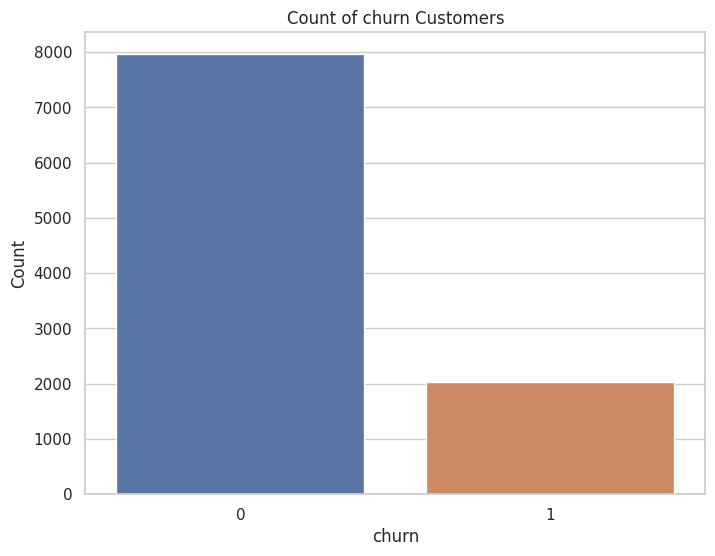

In [48]:
sns.set(style="whitegrid")

# Plotting a bar plot for the 'churn' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='churn')
plt.title('Count of churn Customers')
plt.xlabel('churn')
plt.ylabel('Count')
plt.show()

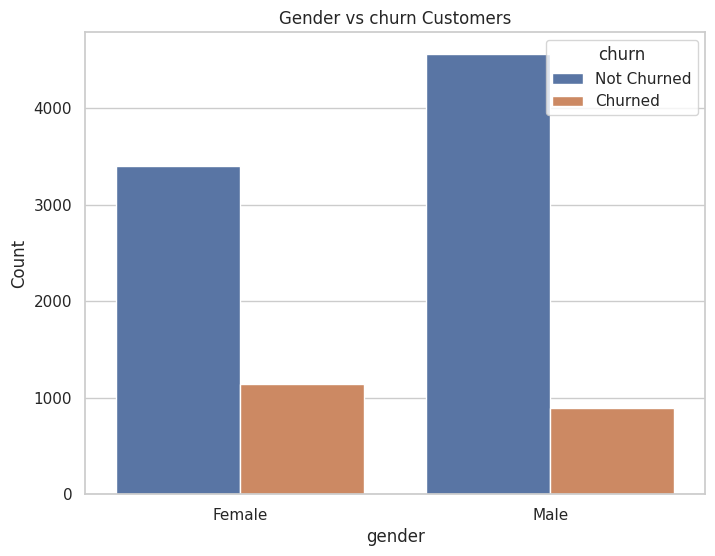

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='churn')
plt.title('Gender vs churn Customers')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

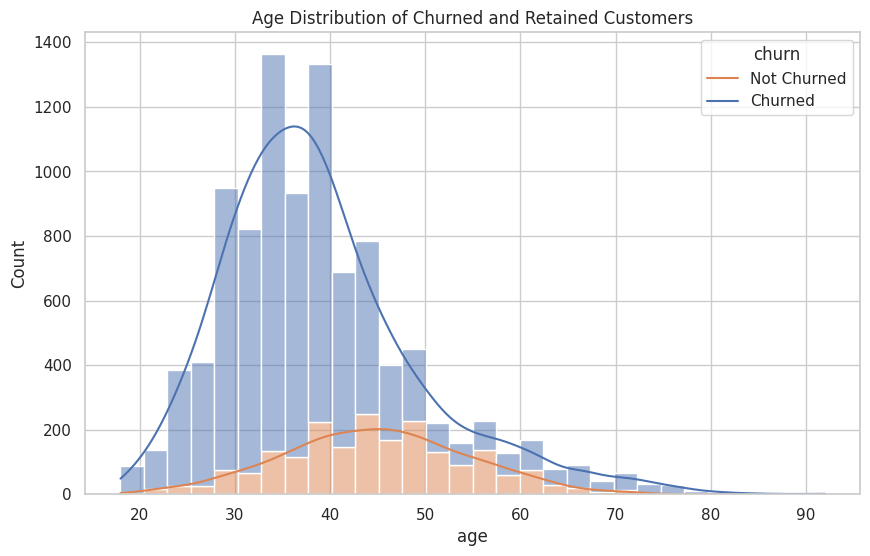

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='churn', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()